## Problem 4.2 - Error Decomposition (by computer)

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

##### functions for approximation and estimation error

In [10]:
# define function for calculation the approximation error
def approximation_error(N):
    max_k = (N - 1) // 2
    return 1/4 - 2/(np.pi)**2 * sum([1/(2 * k + 1)**2 for k in range(0,max_k + 1)])

In [23]:
# define function for the estimation error depending on mu and lambda
def estimation_error(mu, l):
    return np.sum((mu - l)**2)

##### approximation error 

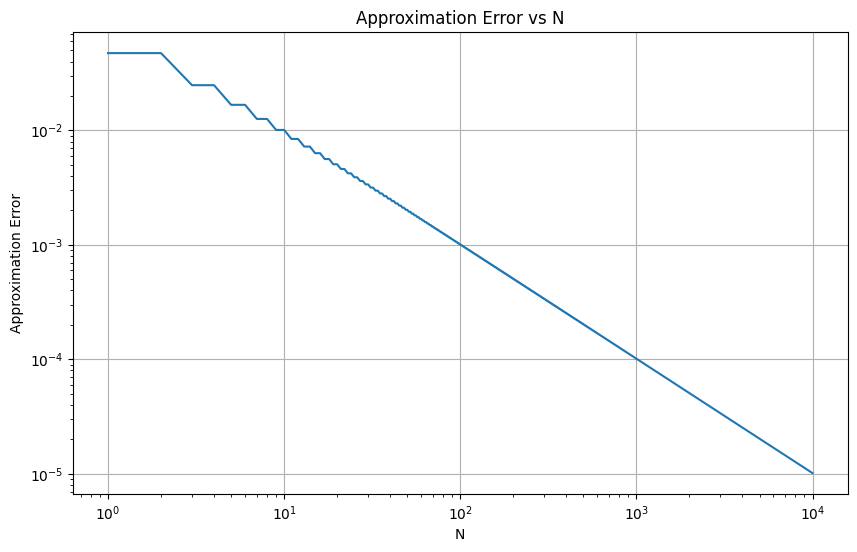

In [24]:
# plot the approximation error for 1 <= N <= 10000 (logarimthmically in x and y)
N_values = range(1, 10001)
approx_errors = [approximation_error(N) for N in N_values]

plt.figure(figsize=(10, 6))
plt.loglog(N_values, approx_errors)
plt.xlabel('N')
plt.ylabel('Approximation Error')
plt.title('Approximation Error vs N')
plt.grid(True)
plt.show()

In [56]:
# compute lambda function
def compute_lambda(N):
    k = (N - 1) // 2
    indk = np.arange(0, k + 1)
    lam = np.power(-1, indk) * np.sqrt(2) / np.pi / (2 * indk + 1)
    lam = np.append([.5], np.ravel([lam, np.zeros(k + 1)], 'F'))
    lam = lam[:N + 1]  # remove last element to match size N
    return lam

In [57]:
# ground truth function (Bayes Predictor)
def ground_truth(x):
    return (x <= 0.5).astype(float)

In [81]:
# compute matrix V 
def compute_V(x, N):
    V = np.sqrt(2) * np.cos(np.pi * np.outer(x, np.arange(1, N + 1)))
    V = np.column_stack((np.ones(len(x)), V)) # add first column of ones
    return V

In [86]:
# fix sample size and calculate estimation error
n = 1000
sigma = 0.1
trials = 10
np.random.seed(42)
x = np.linspace(0, 1, n)
model_class_complexities = np.floor(np.power(10, np.linspace(1, 3, 20))).astype(int)
est_error = []
approx_error = []

for N in model_class_complexities:
    lam = compute_lambda(N)
    # average estimation error over 10 trials
    trial_est_errors = []
    for _ in range(trials):
        V = compute_V(x, N)
        y = ground_truth(x) + np.random.normal(0, sigma, n)
        mu = np.linalg.pinv(V.T @ V) @ V.T @ y
        trial_est_errors.append(np.sum((mu - lam)**2))
    est_error.append(np.mean(trial_est_errors))
    approx_error.append(approximation_error(N))


In [87]:
# determine optimal model class complexity
optimal_N = model_class_complexities[np.argmin(np.array(est_error) + np.array(approx_error))]
print("Optimal Model Class Complexity (N): ", optimal_N)

Optimal Model Class Complexity (N):  112


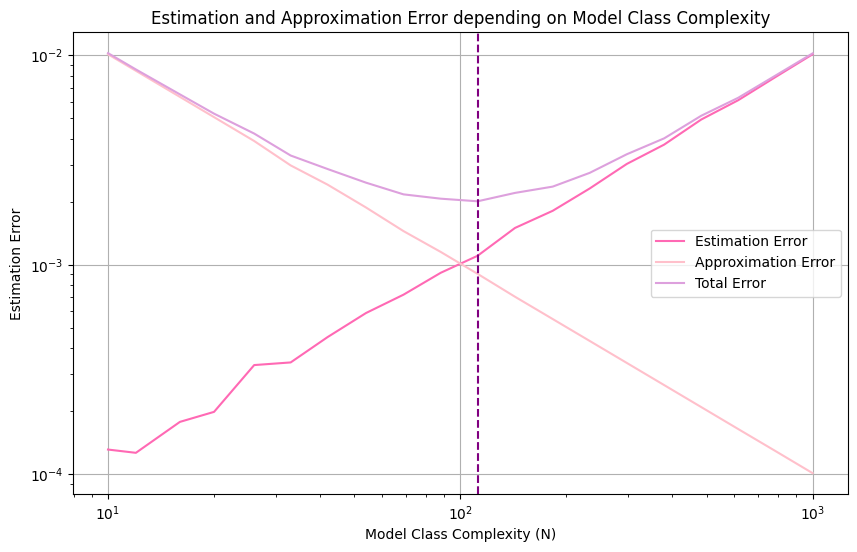

In [88]:
# plot estimation error against model class complexity
plt.figure(figsize=(10, 6))
plt.loglog(model_class_complexities, est_error, color = 'hotpink')
plt.loglog(model_class_complexities, approx_error, color = 'pink')
plt.loglog(model_class_complexities, np.array(est_error) + np.array(approx_error), color = 'plum')
plt.xlabel('Model Class Complexity (N)')
plt.ylabel('Estimation Error')
plt.axvline(x = optimal_N, color = 'purple', linestyle = '--', label='Optimal N = {}'.format(optimal_N))
plt.title('Estimation and Approximation Error depending on Model Class Complexity')
plt.grid(True)
plt.legend(['Estimation Error', 'Approximation Error', 'Total Error'])
plt.show()

In [105]:
def compute_f_N(x, N):
    V = compute_V(x, N)
    np.random.seed(42)
    y = ground_truth(x) + np.random.normal(0, sigma, n)
    mu = np.linalg.pinv(V.T @ V) @ V.T @ y
    return V @ mu

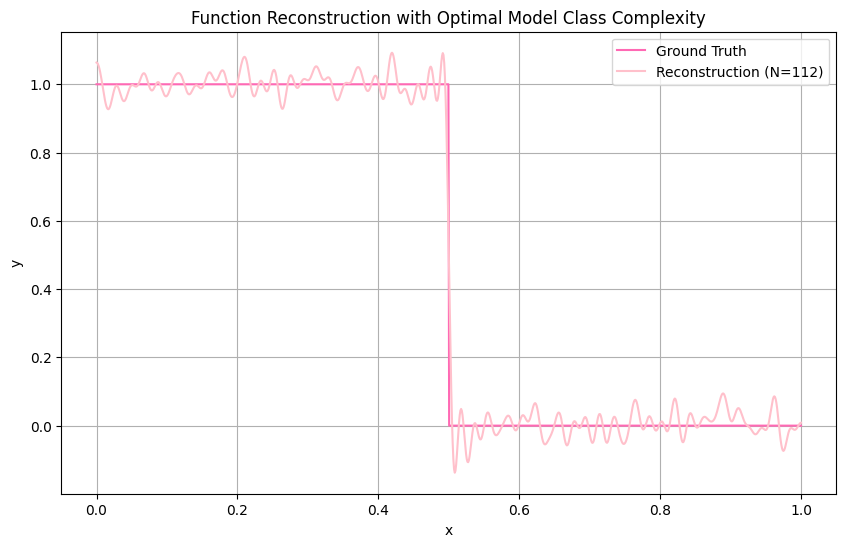

In [106]:
# plot the reconstruction with optimal N
f_N = compute_f_N(x, optimal_N)

plt.figure(figsize = (10, 6))
plt.plot(x, ground_truth(x), label = 'Ground Truth', color = 'hotpink')
plt.plot(x, f_N, label = 'Reconstruction (N={})'.format(optimal_N), color = 'pink')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function Reconstruction with Optimal Model Class Complexity')
plt.legend()
plt.grid(True)
plt.show()